<a href="https://colab.research.google.com/github/aishworyann/Image-encryption-using-novel-4D-Chaotic-map-Key-image-and-DNA-Encoding/blob/main/4D_encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
from PIL import Image

# **Importing image**

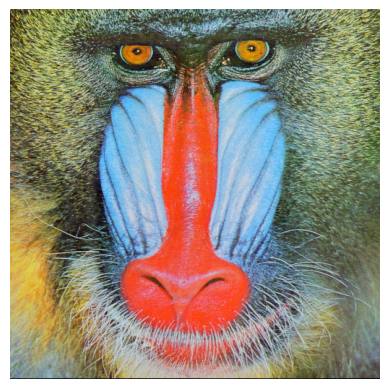

In [ ]:
# img = cv2.imread('lena_color.tiff')
img =cv2.imread('baboon.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
height , width = img.shape[:2]
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  512
The width of the image is:  512


# **Random Vector Generation**

In [ ]:
# Generate a random vector for the rows
VR = [np.random.randint(0, height) for _ in range(height)]
VC = [np.random.randint(0, width) for _ in range(width)]


# **Row-wise Pixel Permutation**

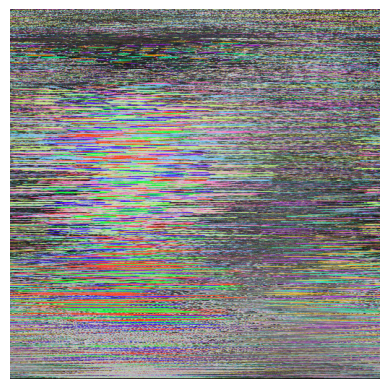

In [ ]:
def rotate_array_right(arr, rotation_values):
    num_rows, num_cols = arr.shape[:2]

    # Ensure rotation_values has the same length as the number of rows in arr
    if len(rotation_values) != num_rows:
        raise ValueError("Number of rotation values must match the number of rows in the array.")

    for row_idx, num_rotations in enumerate(rotation_values):
        row = arr[row_idx, :]
        num_rotations = num_rotations % num_cols  # Ensure num_rotations is within range
        rotated_row = np.roll(row, -num_rotations)  # Rotate the row to the right
        arr[row_idx, :] = rotated_row

def rotate_array_left(arr, rotation_values):
    num_rows, num_cols = arr.shape[:2]

    # Ensure rotation_values has the same length as the number of rows in arr
    if len(rotation_values) != num_rows:
        raise ValueError("Number of rotation values must match the number of rows in the array.")

    for row_idx, num_rotations in enumerate(rotation_values):
        row = arr[row_idx, :]
        num_rotations = num_rotations % num_cols  # Ensure num_rotations is within range
        rotated_row = np.roll(row, num_rotations)  # Rotate the row to the left
        arr[row_idx, :] = rotated_row


# Rotate the image pixels to the right based on the rotation values
rotate_array_right(img, VR)

# Display the encrypted image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# **Column-wise Pixel Permutation**

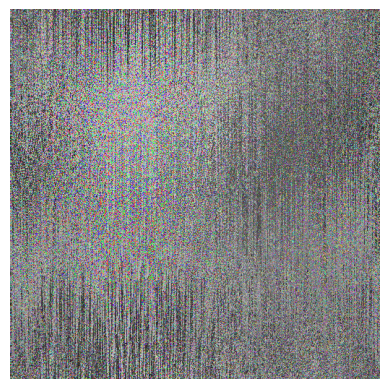

In [ ]:
def rotate_col(arr, rotations):

# Set the number of rows and columns to 512
  nrows, ncols = arr.shape[:2]

# Rotate each column using the rotating value array
  for j in range(ncols):
    arr[:,j] = np.roll(arr[:,j], -rotations[j])


def rotate_col_re(arr, rotations):

# Set the number of rows and columns to 512
  nrows, ncols = arr.shape[:2]

# Rotate each column using the rotating value array
  for j in range(ncols):
    arr[:,j] = np.roll(arr[:,j], rotations[j])

rotate_col(img, VC)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



# **Channel Seperation**

In [ ]:
# image= Image.open(img)
red, green, blue = cv2.split(img)
cv2.imwrite('red.png', red)
cv2.imwrite('green.png', green)
cv2.imwrite('blue.png', blue)
cv2.imwrite('green_1.png', green)


True

# **Interupt Calculation**

In [ ]:
def calculate_value(image_path):
    image = Image.open(image_path)
    width, height = image.size
    pixels = list(image.getdata())
    pixel_sum = sum([sum(pixel)/3 for pixel in pixels])  # convert RGB tuples to integer values
    mean = pixel_sum / (width * height)
    value = mean / ((width * height) + pixel_sum)
    # print(width)
    # print(height)
    return value

# image_path = 'lena_color.tiff'
image_path='baboon.png'
value = calculate_value(image_path)
print("Value:", value)


Value: 3.7847676815560303e-06


# **4D Chaotic Map**

In [ ]:
def normalize(value, max_value):
    return value % max_value

def apply_4d_chaotic_equations(input_image_path, output_image_path, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w):
    input_image = Image.open(input_image_path).convert('L')
    width, height = input_image.size

    output_image = Image.new('L', (width, height))

    x = initial_x
    y = initial_y
    z = initial_z
    w = initial_w

    for x_pixel in range(width):
        for y_pixel in range(height):

            pixel_value = input_image.getpixel((x_pixel, y_pixel))

            x_new = normalize(a1 * x + y * z + a2 * w ** 2 + a3, 256)
            y_new = normalize(a4 * y - x * z + abs(w) * y, 256)
            z_new = normalize(x * y + a5 * z, 256)
            w_new = normalize(w + a6 * z, 256)

            x = x_new
            y = y_new
            z = z_new
            w = w_new

            transformed_pixel_value = pixel_value ^ int(x_new) ^ int(y_new) ^ int(z_new) ^ int(w_new)

            output_image.putpixel((x_pixel, y_pixel), transformed_pixel_value)
    output_image.save(output_image_path)

input_image_1 = 'red.png'
input_image_2 = 'green.png'
input_image_3 = 'blue.png'
input_image_4 = 'green_1.png'

output_image_1 = 'output_red.png'
output_image_2 = 'output_green.png'
output_image_3 = 'output_blue.png'
output_image_4 = 'output_green_1.png'

a1 = 12+value
a2 = 0.05+value
a3 = 0.4+value
a4 = 8+value
a5 = 45+value
a6 = 10+value

initial_x = 0.02+value
initial_y = 0.01+value
initial_z = 0.03+value
initial_w = 0.04+value

apply_4d_chaotic_equations(input_image_1, output_image_1, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_2, output_image_2, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_3, output_image_3, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_4, output_image_4, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)

# **Logistic map encryption for key image**

In [ ]:
def keygen(size):
    # Generate a random key of the specified size
    return np.random.bytes(size)

def logistic_map(x, r):
    # Compute the next value of the logistic map given the current value and the parameter r
    return r * x * (1 - x)

def chaotic_map(seed, r, n):
    # Generate a keystream using the logistic map with the specified seed and parameter r
    keystream = bytearray(n)
    x = seed
    for i in range(n):
        x = logistic_map(x, r)
        keystream[i] = int(256 * x)
    return np.array(keystream)

# Load the plaintext image
img = cv2.imread('jetplane.tif', cv2.IMREAD_UNCHANGED)

# Generate a secret key
key = keygen(img.size)

# Generate a keystream using a chaotic map
seed = np.random.rand()
r = 3.9
keystream = chaotic_map(seed, r, img.size)

# Reshape the keystream to match the shape of the image
keystream = np.reshape(keystream, img.shape)

# Encrypt the image by XORing it with the keystream
ciphertext = cv2.bitwise_xor(img, keystream)

# Save the ciphertext and the secret key
cv2.imwrite('encrypted_image.png', ciphertext)

True

In [ ]:
h,w= ciphertext.shape[:2]
print(h)
print(w)
output=cv2.imread('output_blue.png')
h1,h2= output.shape[:2]
print(h1)
print(h2)

512
512
512
512


# **XOR of key image with the 4 chaotic maps**

In [ ]:
# Example usage
img1 =cv2.imread('encrypted_image.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('output_blue.png', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('output_red.png', cv2.IMREAD_UNCHANGED)
img4 = cv2.imread('output_green.png', cv2.IMREAD_UNCHANGED)
img5 = cv2.imread('output_green_1.png', cv2.IMREAD_UNCHANGED)

img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# XOR the resized img1 with the other images
result1 = cv2.bitwise_xor(img1_resized, img2)
result2 = cv2.bitwise_xor(img1_resized, img3)
result3 = cv2.bitwise_xor(img1_resized, img4)
result4 = cv2.bitwise_xor(img1_resized, img5)

cv2.imwrite('result1.jpg', result1)
cv2.imwrite('result2.jpg', result2)
cv2.imwrite('result3.jpg', result3)
cv2.imwrite('result4.jpg', result4)



True

In [ ]:
red_channel = Image.open("result2.jpg")
green_channel = Image.open("result3.jpg")
blue_channel = Image.open("result1.jpg")
rgb_image = Image.merge("RGB", (red_channel, green_channel, blue_channel))
rgb_image.save("Merged_encrypted.png")

# **DNA ENCODING**

# **Decryption**

# **Channel spliting of encrypted image**

**Noise Add for analysis**

1/4 crop data loss

In [ ]:
# from PIL import Image, ImageDraw

# # Load the image
# image = Image.open("Merged_encrypted.png")

# # Calculate the crop box dimensions
# width, height = image.size
# crop_width = int(0.5 * width)
# crop_height = int(0.5 * height)
# crop_box = (
#     0,
#     0,
#     crop_width,
#     crop_height,
# )

# # Create a new image with a black background
# cropped_image = Image.new("RGB", (width, height), (0, 0, 0))

# # Create a mask image with a white rectangle in the crop box region
# mask = Image.new("L", (width, height), 255)
# draw = ImageDraw.Draw(mask)
# draw.rectangle(crop_box, fill=0)

# # Apply the mask to the cropped image to retain the crop region
# cropped_image.paste(image, (0, 0), mask)

# # Save the cropped image
# cropped_image.save("noise.png")

1/4th crop data loss

In [ ]:
# from PIL import Image, ImageDraw

# # Load the image
# image = Image.open("Merged_encrypted.png")

# # Calculate the crop box dimensions
# width, height = image.size
# crop_box = (int(0.25 * width), int(0.25 * height), int(0.75 * width), int(0.75 * height))

# # Create a new image with a black background
# cropped_image = Image.new("RGB", (width, height), (0, 0, 0))

# # Paste the original image onto the black image at the same position
# cropped_image.paste(image, (0, 0))

# # Create a mask image with a white rectangle in the crop box region
# mask = Image.new("L", (width, height), 0)
# draw = ImageDraw.Draw(mask)
# draw.rectangle(crop_box, fill=255)

# # Apply the mask to the cropped image to make the crop region black
# cropped_image.paste((0, 0, 0), (0, 0), mask)

# # Save the cropped image
# cropped_image.save("noise.png")

3/4th crop data loss

In [ ]:
# from PIL import Image, ImageDraw

# # Load the image
# image = Image.open("Merged_encrypted.png")

# # Calculate the crop box dimensions
# width, height = image.size
# crop_width = int(0.5 * width)
# crop_height = int(0.5 * height)
# crop_box = (
#     0,
#     0,
#     crop_width,
#     crop_height,
# )

# # Create a new image with a black background
# cropped_image = Image.new("RGB", (width, height), (0, 0, 0))

# # Paste the original image onto the black image at the same position
# cropped_image.paste(image, (0, 0))

# # Create a mask image with a white rectangle in the crop box region
# mask = Image.new("L", (width, height), 255)
# draw = ImageDraw.Draw(mask)
# draw.rectangle(crop_box, fill=0)

# # Apply the mask to the cropped image to make the crop region black
# cropped_image.paste((0, 0, 0), (0, 0), mask)

# # Save the cropped image
# cropped_image.save("noise.png")

In [ ]:

# # Load the image
# image = cv2.imread("Merged_encrypted.png")

# # Generate random noise positions
# noise_intensity = 0.05  # Set the intensity to 50% of the image size
# num_pixels = image.shape[0] * image.shape[1]
# num_noise_pixels = int(noise_intensity * num_pixels)

# if num_noise_pixels > num_pixels:
#     num_noise_pixels = num_pixels

# noise_positions = np.random.choice(num_pixels, num_noise_pixels, replace=False)

# # Apply pepper noise
# image_flat = image.reshape(-1, 3)
# image_flat[noise_positions] = 0  # Set the pixel values at noise positions to black (0, 0, 0)

# # Reshape the flattened image back to the original shape
# image_with_noise = image_flat.reshape(image.shape)

# # Save the modified image
# cv2.imwrite('noise.png', image_with_noise)

In [ ]:
# en_img = cv2.imread("noise.png")
# red, green, blue = cv2.split(en_img)
# cv2.imwrite('decrypt_red.png', red)
# cv2.imwrite('decrypt_green.png', green)
# cv2.imwrite('decrypt_blue.png', blue)
# cv2.imwrite('decrypt_green_1.png', green)

In [ ]:
en_img = cv2.imread("Merged_encrypted.png")
red, green, blue = cv2.split(en_img)
cv2.imwrite('decrypt_red.png', red)
cv2.imwrite('decrypt_green.png', green)
cv2.imwrite('decrypt_blue.png', blue)
cv2.imwrite('decrypt_green_1.png', green)

True

# **XOR of key image with the spilited channel**

In [ ]:
img1 =cv2.imread('encrypted_image.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('decrypt_blue.png', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('decrypt_red.png', cv2.IMREAD_UNCHANGED)
img4 = cv2.imread('decrypt_green.png', cv2.IMREAD_UNCHANGED)
img5 = cv2.imread('decrypt_green_1.png', cv2.IMREAD_UNCHANGED)

img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# XOR the resized img1 with the other images
result1 = cv2.bitwise_xor(img1_resized, img2)
result2 = cv2.bitwise_xor(img1_resized, img3)
result3 = cv2.bitwise_xor(img1_resized, img4)
result4 = cv2.bitwise_xor(img1_resized, img5)

cv2.imwrite('decrypt_blue_result1.jpg', result1)
cv2.imwrite('decrypt_red_result2.jpg', result2)
cv2.imwrite('decrypt_green_result3.jpg', result3)
cv2.imwrite('decrypt_green_1_result4.jpg', result4)

True

# **Obtaining the scrambled image by XOR of the 4 maps**

In [ ]:
def normalize(value, max_value):
    return value % max_value

def apply_4d_chaotic_equations(input_image_path, output_image_path, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w):
    input_image = Image.open(input_image_path).convert('L')
    width, height = input_image.size

    output_image = Image.new('L', (width, height))

    x = initial_x
    y = initial_y
    z = initial_z
    w = initial_w

    for x_pixel in range(width):
        for y_pixel in range(height):

            pixel_value = input_image.getpixel((x_pixel, y_pixel))

            x_new = normalize(a1 * x + y * z + a2 * w ** 2 + a3, 256)
            y_new = normalize(a4 * y - x * z + abs(w) * y, 256)
            z_new = normalize(x * y + a5 * z, 256)
            w_new = normalize(w + a6 * z, 256)

            x = x_new
            y = y_new
            z = z_new
            w = w_new

            transformed_pixel_value = pixel_value ^ int(x_new) ^ int(y_new) ^ int(z_new) ^ int(w_new)

            output_image.putpixel((x_pixel, y_pixel), transformed_pixel_value)
    output_image.save(output_image_path)

input_image_1 = 'decrypt_red_result2.jpg'
input_image_2 = 'decrypt_green_result3.jpg'
input_image_3 = 'decrypt_blue_result1.jpg'
input_image_4 = 'decrypt_green_1_result4.jpg'

output_image_1 = 'o_red.png'
output_image_2 = 'o_green.png'
output_image_3 = 'o_blue.png'
output_image_4 = 'o_green_1.png'

a1 = 12+value
a2 = 0.05+value
a3 = 0.4+value
a4 = 8+value
a5 = 45+value
a6 = 10+value

initial_x = 0.02+value
initial_y = 0.01+value
initial_z = 0.03+value
initial_w = 0.04+value

apply_4d_chaotic_equations(input_image_1, output_image_1, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_2, output_image_2, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_3, output_image_3, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_4, output_image_4, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)

# **Merge the channels into one**

In [ ]:
red_channel = Image.open("o_red.png")
green_channel = Image.open("o_green.png")
blue_channel = Image.open("o_blue.png")
rgb_image = Image.merge("RGB", (red_channel, green_channel, blue_channel))
rgb_image.save("Merged.png")

# **Re-sramble the image column-wise**

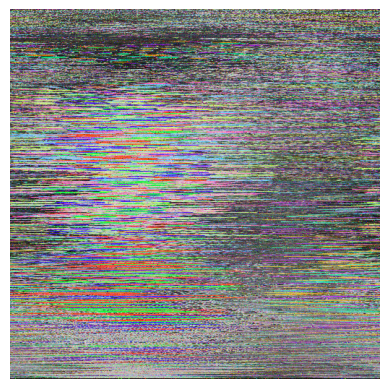

In [ ]:
merged=cv2.imread("Merged.png")
rotate_col_re(merged, VC)
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# **Re-scramble the image row-wise**

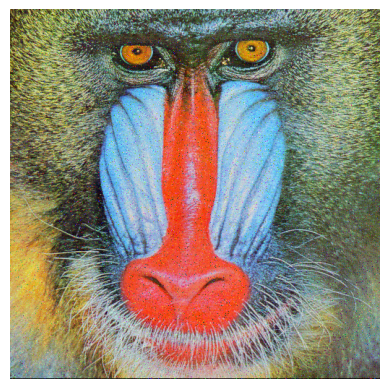

True

In [ ]:
# Rotate the image pixels to the left based on the same rotation values to decrypt
rotate_array_left(merged, VR)

# Display the decrypted image
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
cv2.imwrite("Decrypted.png",merged)

# **Analysis**

# Pixel Distribution

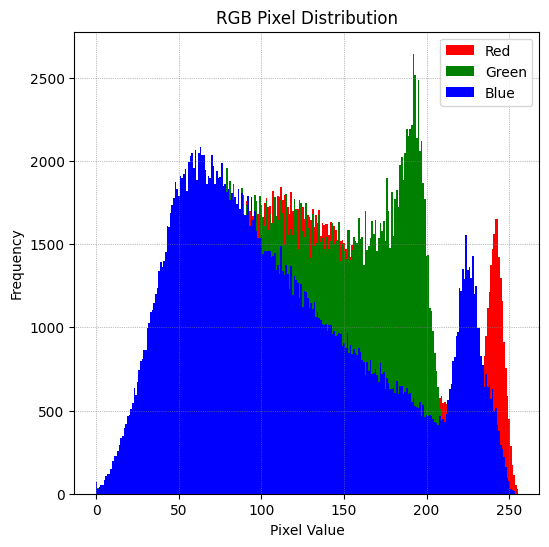

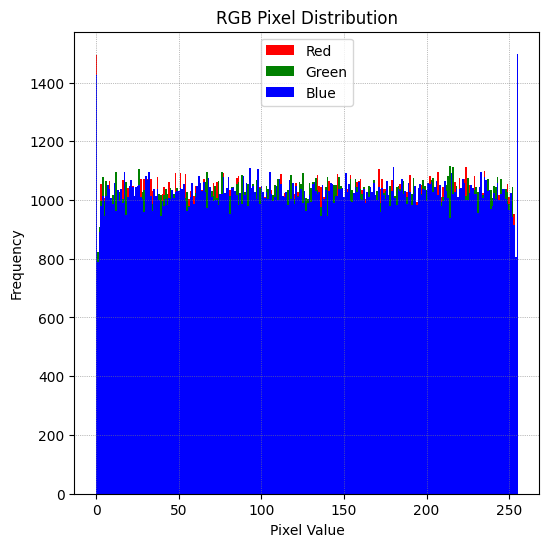

In [ ]:
def rgb_pixel_distribution(image_path):
    # Load the image
    image = Image.open(image_path)
    pixels = np.asarray(image)

    red_channel = pixels[:, :, 0].flatten()
    green_channel = pixels[:, :, 1].flatten()
    blue_channel = pixels[:, :, 2].flatten()

    red_hist, red_bins = np.histogram(red_channel, bins=256, range=[0, 256])
    green_hist, green_bins = np.histogram(green_channel, bins=256, range=[0, 256])
    blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=[0, 256])

    plt.figure(figsize=(6, 6))
    plt.bar(red_bins[:-1], red_hist, width=1, color='red', label='Red')
    plt.bar(green_bins[:-1], green_hist, width=1, color='green', label='Green')
    plt.bar(blue_bins[:-1], blue_hist, width=1, color='blue', label='Blue')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("RGB Pixel Distribution")
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=0.5, color='gray')  # Add thin grid
    plt.show()

    return red_hist, red_bins, green_hist, green_bins, blue_hist, blue_bins

# image_path = "lena_color.tiff"
image_path = "baboon.png"
red_hist, red_bins, green_hist, green_bins, blue_hist, blue_bins = rgb_pixel_distribution(image_path)

# print("Red Histogram:", red_hist)
# print("Red Bins:", red_bins)
# print("Green Histogram:", green_hist)
# print("Green Bins:", green_bins)
# print("Blue Histogram:", blue_hist)
# print("Blue Bins:", blue_bins)

image_path = "Merged_encrypted.png"
red_hist, red_bins, green_hist, green_bins, blue_hist, blue_bins = rgb_pixel_distribution(image_path)
# print("Red Histogram:", red_hist)
# print("Red Bins:", red_bins)
# print("Green Histogram:", green_hist)
# print("Green Bins:", green_bins)
# print("Blue Histogram:", blue_hist)
# print("Blue Bins:", blue_bins)

# **Pixel Distribution**

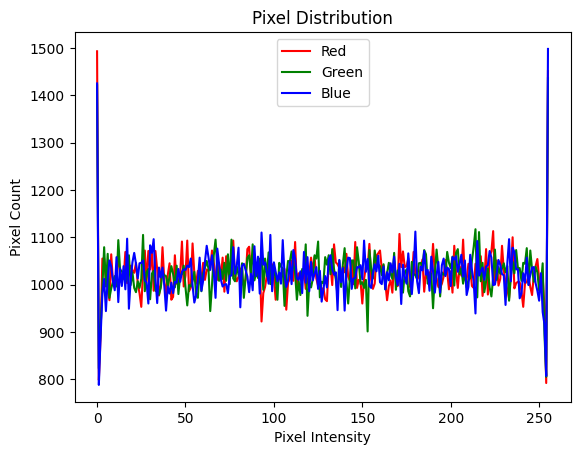

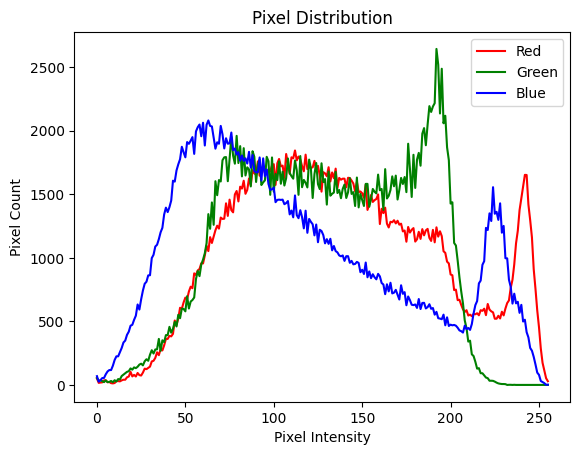

In [ ]:
def plot_3d_histogram(image):
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Extract the color channels
    red_channel = image_array[:,:,0].flatten()
    green_channel = image_array[:,:,1].flatten()
    blue_channel = image_array[:,:,2].flatten()

    # Create histograms for each channel
    red_hist, red_bins = np.histogram(red_channel, bins=256, range=[0, 255])
    green_hist, green_bins = np.histogram(green_channel, bins=256, range=[0, 255])
    blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=[0, 255])

    # Create the x-axis values for the histogram plot
    x = np.arange(256)

    # Plot the histograms

    plt.plot(x, red_hist, color='red', label='Red')
    plt.plot(x, green_hist, color='green', label='Green')
    plt.plot(x, blue_hist, color='blue', label='Blue')

    # Set labels and title
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.title('Pixel Distribution')
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
image = cv2.imread('Merged_encrypted.png')
# image = cv2.imread('baboon.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot_3d_histogram(image)
image = cv2.imread('baboon.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot_3d_histogram(image)

# **Corelation of Adjacent pixels**

Horizontal Correlation: 0.8665436450022657
Vertical Correlation: 0.7587316787867133
Diagonal Correlation: 0.7261889561688963
Counter-diagonal Correlation: 0.7158022437131925


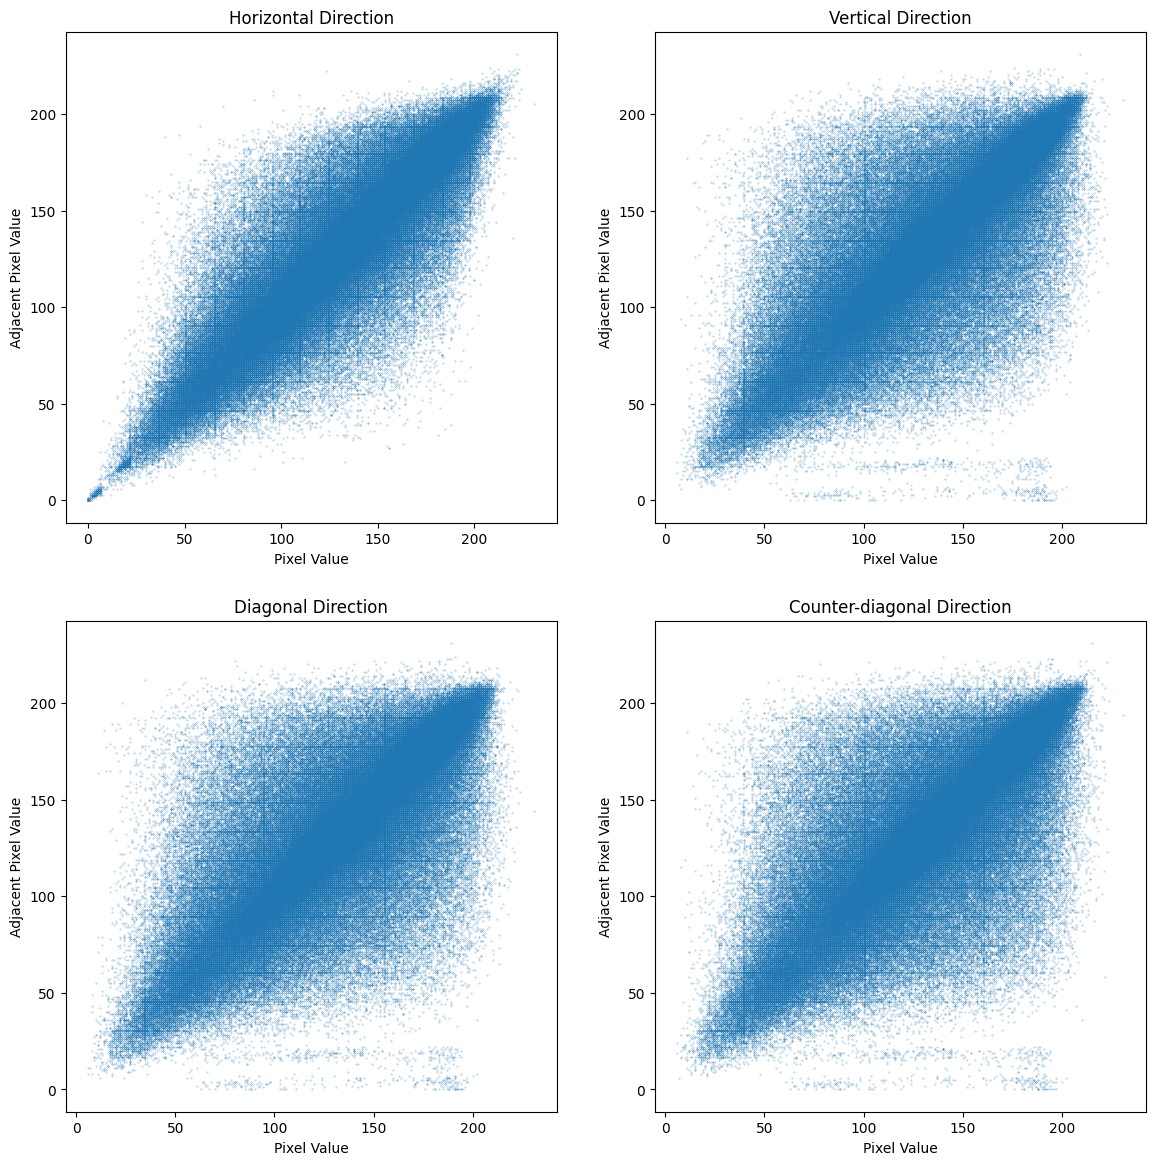

In [ ]:
def calculate_correlation(image):
    horizontal_corr = np.corrcoef(image[:, :-1].flatten(), image[:, 1:].flatten())[0, 1]

    vertical_corr = np.corrcoef(image[:-1, :].flatten(), image[1:, :].flatten())[0, 1]

    diagonal_corr = np.corrcoef(image[:-1, :-1].flatten(), image[1:, 1:].flatten())[0, 1]

    counter_diag_corr = np.corrcoef(image[:-1, 1:].flatten(), image[1:, :-1].flatten())[0, 1]
    return horizontal_corr, vertical_corr, diagonal_corr, counter_diag_corr

# Load image
# image_path = 'Merged_encrypted.png'
image_path= "baboon.png"
# image_path= "lena_color.tiff"

image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)

# Set the dot size and transparency for scatter plots
dot_size = 0.1
dot_alpha = 0.5

horizontal_corr, vertical_corr, diagonal_corr, counter_diag_corr = calculate_correlation(image)

print("Horizontal Correlation:", horizontal_corr)
print("Vertical Correlation:", vertical_corr)
print("Diagonal Correlation:", diagonal_corr)
print("Counter-diagonal Correlation:", counter_diag_corr)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)

ax[0, 0].scatter(image[:, :-1].flatten(), image[:, 1:].flatten(), s=dot_size, alpha=dot_alpha)
ax[0, 0].set_xlabel('Pixel Value')
ax[0, 0].set_ylabel('Adjacent Pixel Value')
ax[0, 0].set_title('Horizontal Direction')

ax[0, 1].scatter(image[:-1, :].flatten(), image[1:, :].flatten(), s=dot_size, alpha=dot_alpha)
ax[0, 1].set_xlabel('Pixel Value')
ax[0, 1].set_ylabel('Adjacent Pixel Value')
ax[0, 1].set_title('Vertical Direction')

ax[1, 0].scatter(image[:-1, :-1].flatten(), image[1:, 1:].flatten(), s=dot_size, alpha=dot_alpha)
ax[1, 0].set_xlabel('Pixel Value')
ax[1, 0].set_ylabel('Adjacent Pixel Value')
ax[1, 0].set_title('Diagonal Direction')

ax[1, 1].scatter(image[:-1, 1:].flatten(), image[1:, :-1].flatten(), s=dot_size, alpha=dot_alpha)
ax[1, 1].set_xlabel('Pixel Value')
ax[1, 1].set_ylabel('Adjacent Pixel Value')
ax[1, 1].set_title('Counter-diagonal Direction')

plt.show()

## **Differential Analysis**

In [ ]:
def calculate_npcr(image1, image2):

    width, height = image1.shape[:2]
    # total_pixels = width * height
    # changed_pixels = 0
    total_pixels = image1.size
    changed_pixels = np.count_nonzero(image1 != image2)

    npcr = (changed_pixels / total_pixels) * 100
    return npcr
    # for x in range(width):
    #     for y in range(height):
    #         pixel1 = image1[x][y]
    #         pixel2 = image2[x][y]
    #         if pixel1 != pixel2:
    #             changed_pixels += 1

    # npcr = (changed_pixels / total_pixels) * 100
    # return npcr


def calculate_uaci(image1, image2):

    width, height = image1.shape[:2]
    # total_pixels = width * height
    # intensity_difference = 0
    total_pixels = image1.size
    intensity_difference = np.sum(np.abs(image1 - image2))

    uaci = (intensity_difference / (total_pixels * 255)) * 100
    return uaci
    # for x in range(width):
    #     for y in range(height):
    #         pixel1 = image1[x][y ]
    #         pixel2 = image2[x][y]
    #         intensity_difference += abs(pixel1 - pixel2)

    # uaci = (intensity_difference / (total_pixels * 255)) * 100
    # return uaci

# original_image = np.array(Image.open("baboon.png"))
original_image = np.array(Image.open("lena_color.tiff"))

# original_image = Image.open("lena_color.tiff").convert("L")
modified_image = np.array(Image.open("Merged_encrypted.png"))



npcr_value = calculate_npcr(original_image, modified_image)
uaci_value = calculate_uaci(original_image, modified_image)

print("NPCR: {:.2f}%".format(npcr_value))
print("UACI: {:.2f}%".format(uaci_value))


NPCR: 99.61%
UACI: 50.01%


In [ ]:
import numpy as np
from PIL import Image

def calculate_npcr_channel(channel1, channel2):
    total_pixels = channel1.size
    changed_pixels = np.count_nonzero(channel1 != channel2)
    return (changed_pixels / total_pixels) * 100

def calculate_uaci_channel(channel1, channel2):
    total_pixels = channel1.size
    intensity_difference = np.sum(np.abs(channel1 - channel2))
    return (intensity_difference / (total_pixels * 255)) * 100

def calculate_npcr_uaci(image1, image2):
    channels1 = np.array(image1).transpose(2,0,1)
    channels2 = np.array(image2).transpose(2,0,1)
    npcrs = []
    uacis = []
    channel_names = ['Red', 'Green', 'Blue']
    for i, (channel1, channel2) in enumerate(zip(channels1, channels2)):
        npcrs.append(calculate_npcr_channel(channel1, channel2))
        uacis.append(calculate_uaci_channel(channel1, channel2))
    return npcrs, uacis, channel_names

# original_image = Image.open("baboon.png")
original_image = Image.open("lena_color.tiff")
modified_image = Image.open("Merged_encrypted.png")

npcrs, uacis, channel_names = calculate_npcr_uaci(original_image, modified_image)
for i, (npcr, uaci) in enumerate(zip(npcrs, uacis)):
    print("{} Channel: NPCR: {:.2f}%, UACI: {:.2f}%".format(channel_names[i], npcr, uaci))


Red Channel: NPCR: 99.63%, UACI: 50.02%
Green Channel: NPCR: 99.60%, UACI: 49.92%
Blue Channel: NPCR: 99.60%, UACI: 50.09%


# **Entropy Analysis**

In [ ]:
def calculate_entropy_whole(image):
    """
    Calculate the information entropy of an image.
    """
    # Flatten the image array
    flat_image = image.flatten()

    # Calculate the probability distribution of pixel intensities
    pixel_counts = np.bincount(flat_image)
    pixel_probabilities = pixel_counts / len(flat_image)

    # Calculate the entropy
    entropy = -np.sum(pixel_probabilities * np.log2(pixel_probabilities + 1e-10))

    return entropy

def calculate_entropy(image):
    _, counts = np.unique(image, return_counts=True)
    probabilities = counts / np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def entropy_analysis(image_path):

    image = cv2.imread(image_path)

    blue, green, red = cv2.split(image)

    entropies = []
    for channel in (blue, green, red):
        entropy = calculate_entropy(channel)
        entropies.append(entropy)

    return entropies

# image_path = 'Merged_encrypted.png'
# image_path = 'lena_color.tiff'
image_path = "baboon.png"



channel_entropies = entropy_analysis(image_path)

channel_names = ['Blue', 'Green', 'Red']
for channel, entropy in zip(channel_names, channel_entropies):
    print(f"Entropy of {channel} Channel: {entropy}")

# Load the image
image = np.array(Image.open("Merged_encrypted.png"))
# image_original = np.array(Image.open("lena_color.tiff"))

# Calculate the entropy
entropy = calculate_entropy_whole(image)
# entropy_original= calculate_entropy_whole(image_original)
print("Entropy:", entropy)
# print("Entropy:", entropy_original)

Entropy of Blue Channel: 7.752217171944649
Entropy of Green Channel: 7.47443158636626
Entropy of Red Channel: 7.7066718426165295
Entropy: 7.998547939306797


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def calculate_correlation(image):
    horizontal_corr = np.corrcoef(image[:, :-1].flatten(), image[:, 1:].flatten())[0, 1]
    vertical_corr = np.corrcoef(image[:-1, :].flatten(), image[1:, :].flatten())[0, 1]
    diagonal_corr = np.corrcoef(image[:-1, :-1].flatten(), image[1:, 1:].flatten())[0, 1]
    counter_diag_corr = np.corrcoef(image[:-1, 1:].flatten(), image[1:, :-1].flatten())[0, 1]
    return horizontal_corr, vertical_corr, diagonal_corr, counter_diag_corr

# Load image
# image_path = "lena_color.tiff"
# image_path = "baboon.png"

image_path = "Merged_encrypted.png"

image = Image.open(image_path)

# Split image into R, G, and B channels
R, G, B = image.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)

# Calculate correlation coefficients for each channel
R_horizontal_corr, R_vertical_corr, R_diagonal_corr, R_counter_diag_corr = calculate_correlation(R)
G_horizontal_corr, G_vertical_corr, G_diagonal_corr, G_counter_diag_corr = calculate_correlation(G)
B_horizontal_corr, B_vertical_corr, B_diagonal_corr, B_counter_diag_corr = calculate_correlation(B)

# Print correlation coefficients
print("R channel - Horizontal Correlation:", R_horizontal_corr)
print("R channel - Vertical Correlation:", R_vertical_corr)
print("R channel - Diagonal Correlation:", R_diagonal_corr)
print("R channel - Counter-diagonal Correlation:", R_counter_diag_corr)
print("G channel - Horizontal Correlation:", G_horizontal_corr)
print("G channel - Vertical Correlation:", G_vertical_corr)
print("G channel - Diagonal Correlation:", G_diagonal_corr)
print("G channel - Counter-diagonal Correlation:", G_counter_diag_corr)
print("B channel - Horizontal Correlation:", B_horizontal_corr)
print("B channel - Vertical Correlation:", B_vertical_corr)
print("B channel - Diagonal Correlation:", B_diagonal_corr)
print("B channel - Counter-diagonal Correlation:", B_counter_diag_corr)

# Plot scatter plots for each channel
# fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
# plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

# ax[0, 0].scatter(R[:, :-1].flatten(), R[:, 1:].flatten(), s=0.1, alpha=0.5)
# ax[0, 0].set_xlabel('Pixel Value')
# ax[0, 0].set_ylabel('Adjacent Pixel Value')
# ax[0, 0].set_title('R channel - Horizontal Direction')

# ax[0, 1].scatter(R[:-1, :].flatten(), R[1:, :].flatten(), s=0.1, alpha=0.5)
# ax[0, 1].set_xlabel('Pixel Value')
# ax[0, 1].set_ylabel('Adjacent Pixel Value')
# ax[0, 1].set_title('R channel - Vertical Direction')

# ax[0, 2].scatter(R[:-1, :-1].flatten(), R[1:, 1:].flatten(), s=0.1, alpha=0.5)
# ax[0, 2].set_xlabel('Pixel Value')
# ax[0, 2].set_ylabel('Adjacent Pixel Value')
# ax[0, 2].set_title('R channel - Diagonal Direction')


R channel - Horizontal Correlation: 0.000996474261131868
R channel - Vertical Correlation: 0.0014215512006415106
R channel - Diagonal Correlation: 0.0018859635428098399
R channel - Counter-diagonal Correlation: 0.0028518238364859017
G channel - Horizontal Correlation: 0.0022875196699059697
G channel - Vertical Correlation: -0.002121182192976879
G channel - Diagonal Correlation: 0.0013333774181592188
G channel - Counter-diagonal Correlation: -0.0023743653057896725
B channel - Horizontal Correlation: -0.001127071702054678
B channel - Vertical Correlation: -0.0012704017278381227
B channel - Diagonal Correlation: 0.003078649359576376
B channel - Counter-diagonal Correlation: 0.001054805113078178


# **Encryption Quality Analysis**

In [ ]:

# # Load the image
# image = cv2.imread("Merged_encrypted.png")

# # Generate random noise positions
# noise_intensity = 0.1  # Set the intensity to 50% of the image size
# num_pixels = image.shape[0] * image.shape[1]
# num_noise_pixels = int(noise_intensity * num_pixels)

# if num_noise_pixels > num_pixels:
#     num_noise_pixels = num_pixels

# noise_positions = np.random.choice(num_pixels, num_noise_pixels, replace=False)

# # Apply pepper noise
# image_flat = image.reshape(-1, 3)
# image_flat[noise_positions] = 0  # Set the pixel values at noise positions to black (0, 0, 0)

# # Reshape the flattened image back to the original shape
# image_with_noise = image_flat.reshape(image.shape)

# # Save the modified image
# cv2.imwrite('noise.png', image_with_noise)

In [ ]:
def calculate_psnr(original_image, decrypted_image):

    mse = calculate_mse(original_image, decrypted_image)
    max_pixel_value = 255

    if mse == 0:
        return float('inf')

    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

def calculate_mse(original_image, decrypted_image):
    diff = np.subtract(original_image, decrypted_image)
    squared_diff = np.square(diff)
    mse = (np.mean(squared_diff))
    return mse

# def calculate_mse(original_image, reconstructed_image):
#     mse = np.mean((original_image - reconstructed_image) ** 2)
#     return mse

# def calculate_psnr(original_image, reconstructed_image, max_pixel_value=255):
#     mse = calculate_mse(original_image, reconstructed_image)
#     psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
#     return psnr

original_image = np.array(Image.open("baboon.png"))
decrypted_image = np.array(Image.open("Decrypted.png"))
# decrypted_image = np.array(Image.open("lena_color.tiff"))


psnr_value = calculate_psnr(original_image, decrypted_image)
mse_value = calculate_mse(original_image, decrypted_image)

print("PSNR: {:.2f} dB".format(psnr_value))
print("MSE: {:.2f}".format(mse_value))

original_channels = cv2.split(original_image)
noisy_channels = cv2.split(decrypted_image)

for i, (original_channel, noisy_channel) in enumerate(zip(original_channels, noisy_channels)):
    mse = calculate_mse(original_channel, noisy_channel)
    # psnr = calculate_psnr(mse)
    psnr= calculate_psnr(original_channel, noisy_channel)

    channel_name = ['Blue', 'Green', 'Red'][i]
    print(f"{channel_name} Channel:")
    print("MSE:", mse)
    if np.isnan(psnr):
        print("PSNR: Cannot be calculated")
    else:
        print("PSNR:", psnr)
    print()

PSNR: 32.70 dB
MSE: 34.94
Blue Channel:
MSE: 34.955169677734375
PSNR: 32.69568946265997

Green Channel:
MSE: 34.958919525146484
PSNR: 32.695223594318065

Red Channel:
MSE: 34.92066955566406
PSNR: 32.699977987569866

